In [2]:
cd /Volumes/Shared/data/Jack/SavageLab/scripts/

/Volumes/Shared/data/Jack/SavageLab/scripts


In [3]:
from matplotlib import pyplot as plt
import matplotlib

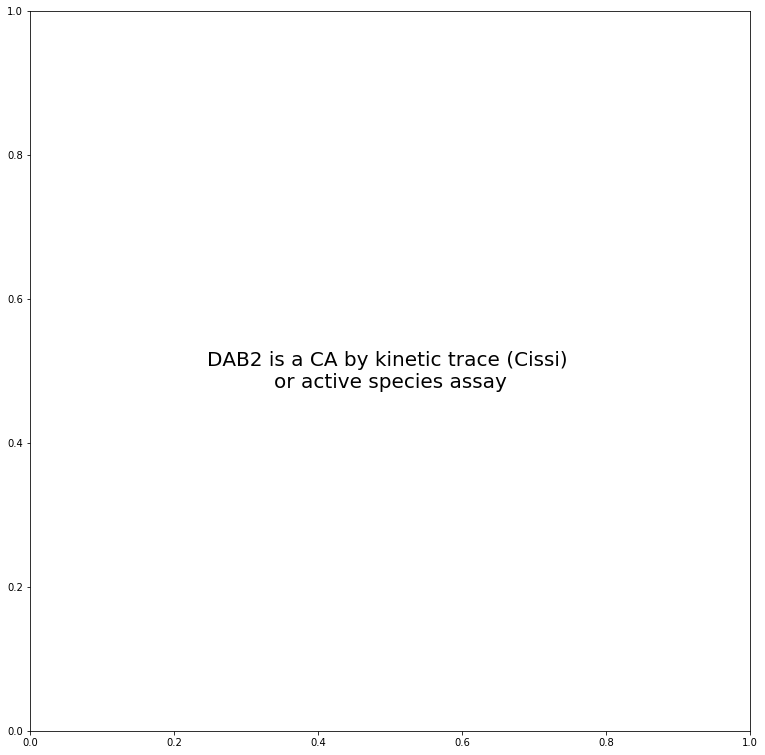

In [4]:
# Making Panel A
%matplotlib inline
def makePanelA(ax):
    ax.text(0.5,0.5,'DAB2 is a CA by kinetic trace (Cissi) \nor active species assay',va='center',ha='center',
            fontsize=20)

fig = plt.figure(figsize=(10,10),frameon=False)
ax=fig.add_axes([0,0,1,1])
makePanelA(ax)
plt.show()

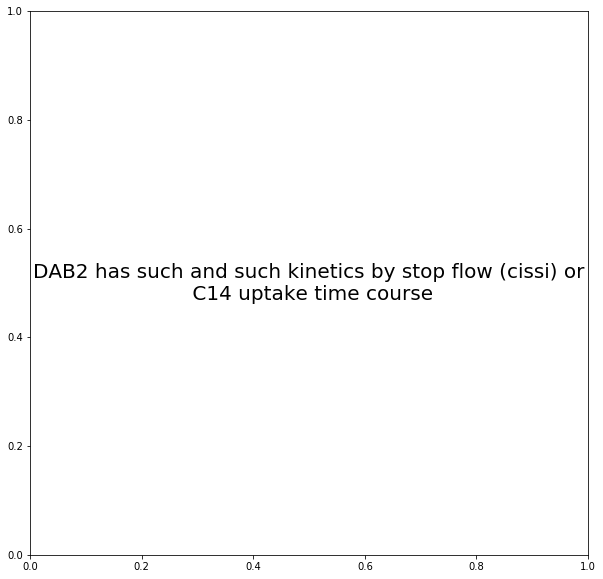

In [5]:
# Making Panel B
%matplotlib inline
def makePanelB(ax):
    import seaborn as sns
    colors=sns.color_palette('husl',8)
    aCol=colors[0]
    bCol=colors[5]
    
    ax.text(0.5,0.5,'DAB2 has such and such kinetics by stop flow (cissi) or\n C14 uptake time course',va='center',ha='center',
            fontsize=20)
    
fig,ax = plt.subplots(figsize=(10,10), frameon=False)
makePanelB(ax)
plt.show()

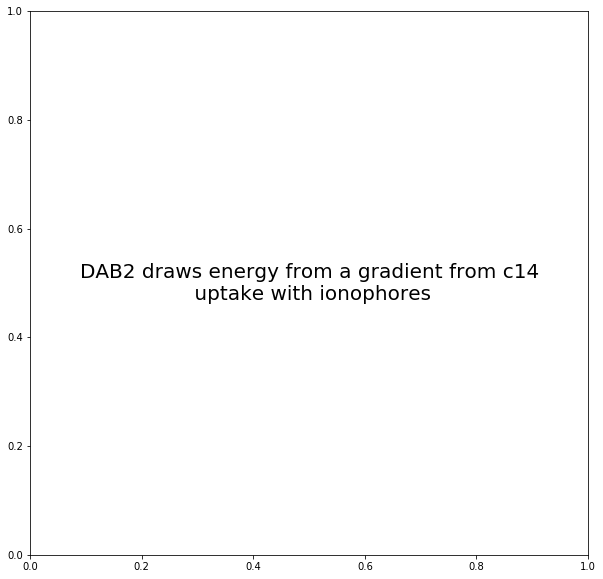

In [6]:
# Making Panel C
%matplotlib inline
def makePanelC(ax):
    ax.text(0.5,0.5,'DAB2 draws energy from a gradient from c14\n uptake with ionophores',va='center',ha='center',
           fontsize=20)
    
fig,ax = plt.subplots(figsize=(10,10), frameon=False)
makePanelC(ax)
plt.show()

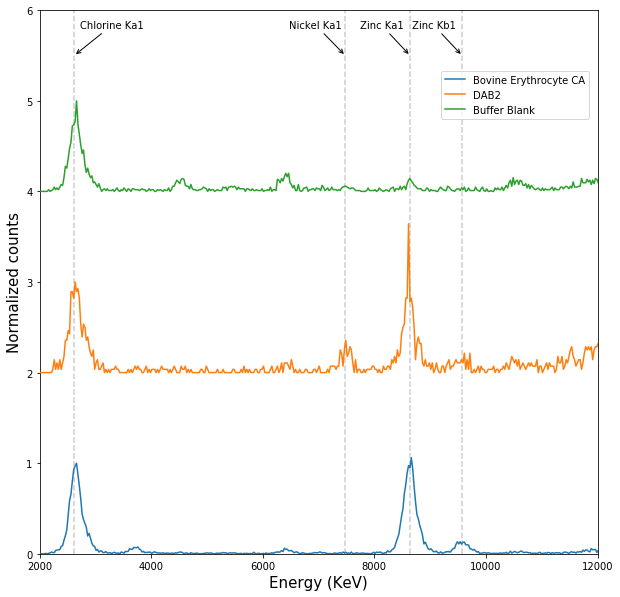

In [22]:
# Making Panel C
%matplotlib inline


def getExcitationScan(filename):
    import numpy as np
    file = open(filename, 'r')
    graph = [line.split() for line in file if line[0].isdigit()]
    file.close()
    return(np.array([float(i[0]) for i in graph]),np.array([float(i[1]) for i in graph]))
# getExcitationScan('/Volumes/Shared/data/Jack/SavageLab/excelSheetsWithEquationsAndData/DAB2-Batch5/xraySpectroscpy/Acetone_BCA_Se_001.bip')

def makePanelD(ax):
    x,y=getExcitationScan('/Volumes/Shared/data/Jack/SavageLab/excelSheetsWithEquationsAndData/DAB2-Batch5/xraySpectroscpy/Acetone_BCA_Se_001.bip')
    y=y/max(y[(x>2000) & (x<3500)])
    ax.plot(x,y,label='Bovine Erythrocyte CA',zorder=5)
    
    x,y=getExcitationScan('/Volumes/Shared/data/Jack/SavageLab/excelSheetsWithEquationsAndData/DAB2-Batch5/xraySpectroscpy/Acetone_DAB2_SEDC_Se_001.bip')
    y=(y/max(y[(x>2000) & (x<3500)]))+2
    ax.plot(x,y,label='DAB2',zorder=5)
    plt.xlim(2000,12000)
    plt.ylim(0,5)
    
    x,y=getExcitationScan('/Volumes/Shared/data/Jack/SavageLab/excelSheetsWithEquationsAndData/DAB2-Batch5/xraySpectroscpy/bufferBlank_03_Se_001.bip')
    y=(y/max(y[(x>2000) & (x<3500)]))+4
    ax.plot(x,y,label='Buffer Blank',zorder=5)
    
#     plt.vlines([2622.39,2815.6,7478.15,8638.86,9572.0],0,6,zorder=0 ,alpha=0.5)
    plt.vlines([2622.39,7478.15,8638.86,9572.0],0,6,zorder=0 ,alpha=0.2,linestyles='--')
    plt.annotate('Chlorine Ka1',[2622.39,5.5],[2722.39,5.8],arrowprops={'arrowstyle':'->'})
    plt.annotate('Nickel Ka1',[7478.15,5.5],[6478.15,5.8],arrowprops={'arrowstyle':'->'})
    plt.annotate('Zinc Ka1',[8638.86,5.5],[7738.86,5.8],arrowprops={'arrowstyle':'->'})
    plt.annotate('Zinc Kb1',[9572.0,5.5],[8672.0,5.8],arrowprops={'arrowstyle':'->'})
    plt.legend(loc=[0.72,0.8])
    plt.xlim(2000,12000)
    plt.ylim(0,6)
    plt.xlabel('Energy (KeV)',fontsize=15)
    plt.ylabel('Normalized counts',fontsize=15)
    
fig,ax = plt.subplots(figsize=(10,10), frameon=False)
makePanelD(ax)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


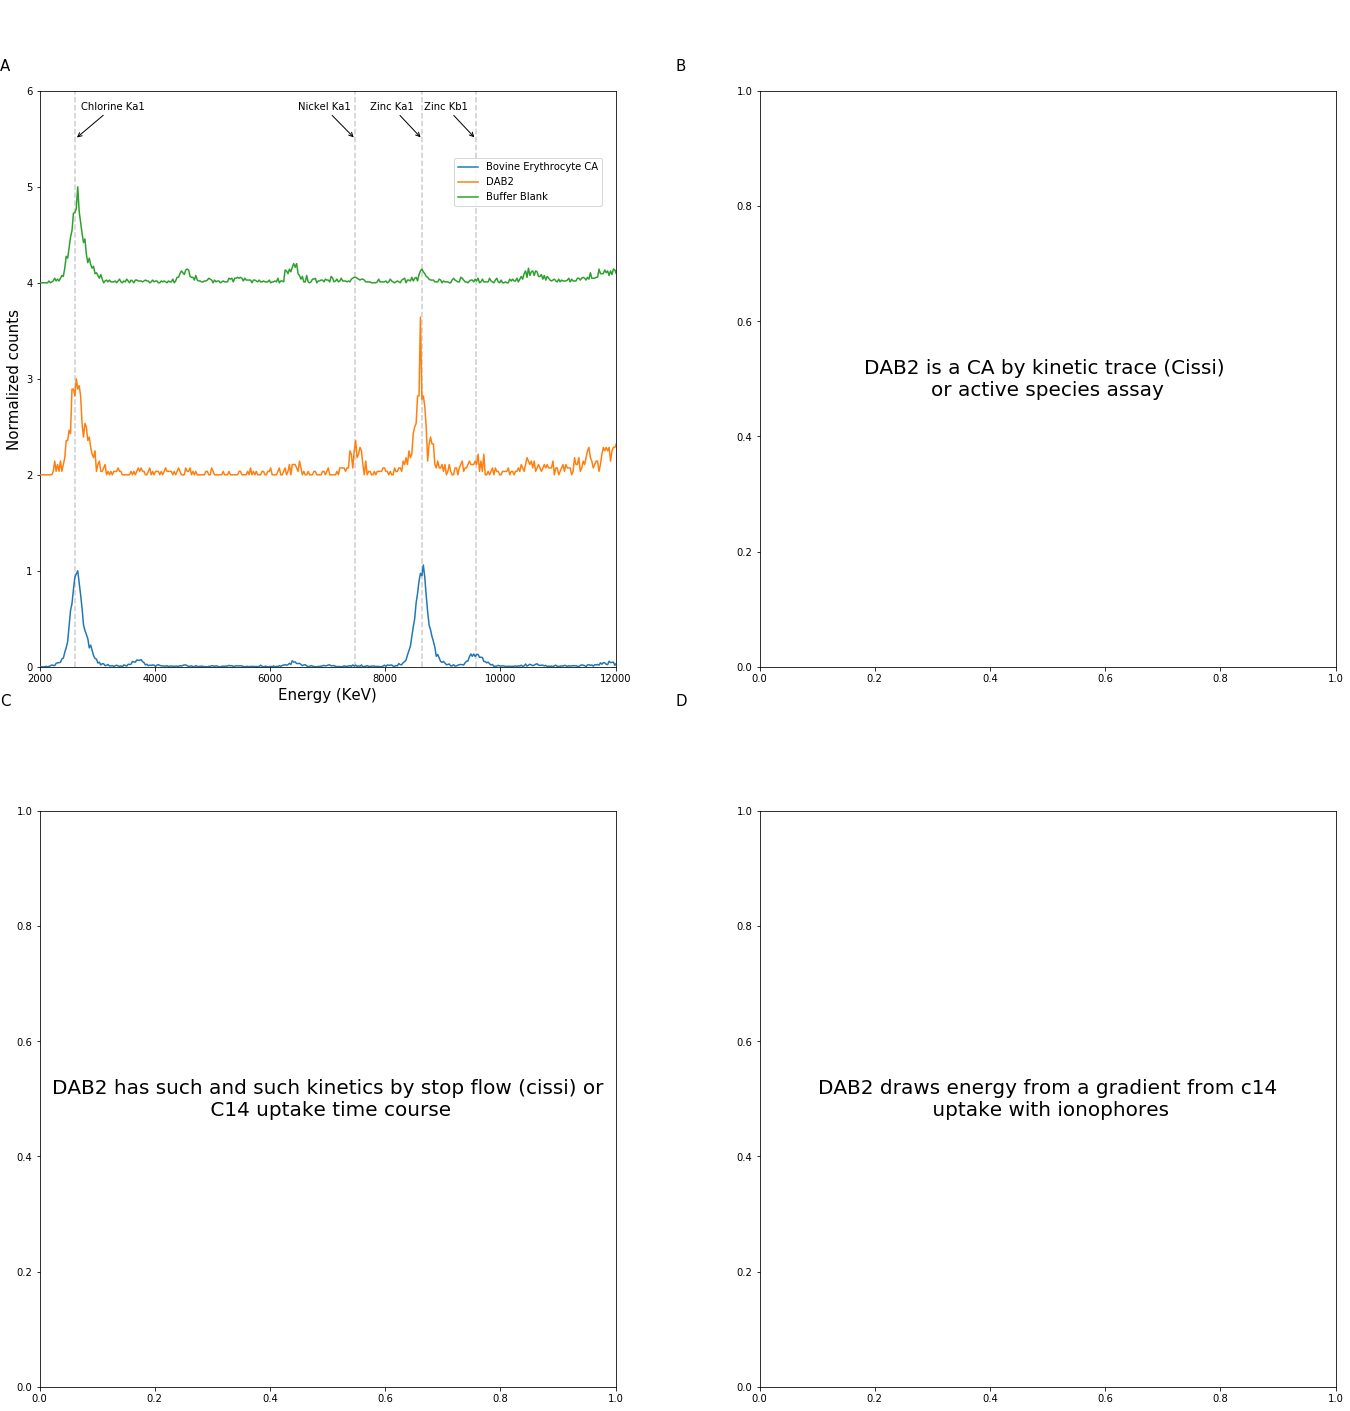

In [23]:
fig = plt.figure(figsize=(20,20),frameon=False)

panelA = fig.add_axes([0,0.5,0.4,0.4])
makePanelD(panelA)
plt.annotate('A',[0,0.95],xycoords='figure fraction',fontsize=15)


panelB = fig.add_axes([0.5,0.5,0.4,0.4])
makePanelA(panelB)
plt.annotate('B',[0.5,0.95],xycoords='figure fraction',fontsize=15)

panelC = fig.add_axes([0,0,0.4,0.4])
makePanelB(panelC)
plt.annotate('C',[0,.5],xycoords='figure fraction',fontsize=15)

panelD = fig.add_axes([0.5,0,0.4,0.4])
makePanelC(panelD)
plt.annotate('D',[0.5,.5],xycoords='figure fraction',fontsize=15)

plt.tight_layout()

plt.savefig('/Volumes/Shared/data/Jack/SavageLab/scripts/FigureMakingForBarseqDABPaper/fig4_biochem_Draft.svg',
           format='svg',bbox_inches='tight')
plt.savefig('/Volumes/Shared/data/Jack/SavageLab/scripts/FigureMakingForBarseqDABPaper/fig4_biochem_Draft.png',
           format='png',bbox_inches='tight')